In [1]:
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
from pycalphad.core.lower_convex_hull import lower_convex_hull
import pycalphad.variables as v

In [2]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']

In [3]:
%lprun -f equilibrium eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (1e-6, 1-1e-6, 0.01), v.T: (300, 2000, 100), v.P: [101325]})
print(eq)

Components: AL FE VA
Phases: AL13FE4 AL2FE AL5FE2 AL5FE4 B2_BCC FCC_A1 HCP_A3 LIQUID [done]
Computing initial grid [820 points, 1.3MB]
Computing convex hull [iteration 1]
progress 269735.129552 [1700 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 2 [AL13FE4]
N-R convergence on mini-iteration 1 [AL5FE4]
N-R convergence on mini-iteration 15 [B2_BCC]
N-R convergence on mini-iteration 1 [FCC_A1]
N-R convergence on mini-iteration 1 [HCP_A3]
N-R convergence on mini-iteration 1 [LIQUID]
Rebuilding grid [2020 points, 3.2MB]
Computing convex hull [iteration 2]
progress 38857.9660394 [1534 conditions updated]
Refining convex hull
N-R convergence on mini-iteration 2 [AL13FE4]
N-R convergence on mini-iteration 1 [AL5FE4]
N-R convergence on mini-iteration 8 [B2_BCC]
N-R convergence on mini-iteration 1 [FCC_A1]
N-R convergence on mini-iteration 1 [HCP_A3]
N-R convergence on mini-iteration 1 [LIQUID]
Rebuilding grid [3220 points, 5.1MB]
Computing convex hull [iteration 3]


In [4]:
eq.X

<xray.DataArray 'X' (P: 1, T: 17, X_AL: 100, vertex: 2, component: 2)>
array([[[[[  1.00325447e-06,   9.99998997e-01],
          [  9.94592418e-07,   9.99999005e-01]],

         [[  1.00011207e-02,   9.89998879e-01],
          [  1.00009195e-02,   9.89999081e-01]],

         [[  2.00010142e-02,   9.79998986e-01],
          [  2.00009080e-02,   9.79999092e-01]],

         ..., 
         [[  1.00000000e+00,   0.00000000e+00],
          [  7.64992674e-01,   2.35007326e-01]],

         [[  1.00000000e+00,   0.00000000e+00],
          [  7.64992674e-01,   2.35007326e-01]],

         [[  1.00000000e+00,   0.00000000e+00],
          [  7.64992674e-01,   2.35007326e-01]]],


        [[[  0.00000000e+00,   1.00000000e+00],
          [  0.00000000e+00,   1.00000000e+00]],

         [[  1.00009611e-02,   9.89999039e-01],
          [  1.00006141e-02,   9.89999386e-01]],

         [[  2.00012197e-02,   9.79998780e-01],
          [  2.00010066e-02,   9.79998993e-01]],

         ..., 
         [[  1.

/home/rotis/anaconda/envs/calphad/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


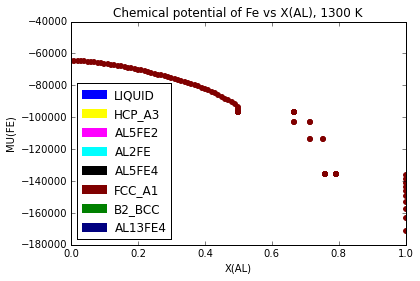

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1300 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p.values[0])] for p in eq.Phase.sel(T=1300, vertex=0)]
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=0), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p.values[0])] for p in eq.Phase.sel(T=1300, vertex=1)]
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=1), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')